<a href="https://colab.research.google.com/github/ShriramM29/Colab/blob/main/Leaf_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras

from keras.utils import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet152, preprocess_input, decode_predictions

In [ ]:
model = ResNet152()

242900224/242900224 [==============================] - 2s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.listdir("/content/drive/MyDrive/Expo/dataSet")

['best_model.h5', 'TEST', 'TRAIN', 'Img1.jpg']

In [ ]:
train_datagen = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, preprocessing_function = preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train = train_datagen.flow_from_directory(directory = "/content/drive/MyDrive/Expo/dataSet/TRAIN",target_size = (256,256), batch_size = 3)

val = val_datagen.flow_from_directory(directory = "/content/drive/MyDrive/Expo/dataSet/TRAIN",target_size = (256,256), batch_size = 3)

Found 718 images belonging to 3 classes.
Found 718 images belonging to 3 classes.


In [ ]:
t_img,label = train.next()

In [ ]:
t_img.shape

(3, 256, 256, 3)

In [ ]:
def plotImage(img_arr, label):
    for im, l in zip(img_arr, label):
        plt.figure(figsize = (5,5))
        plt.imshow(im)
        plt.show()

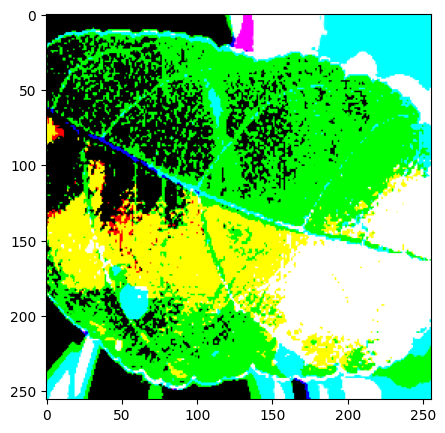

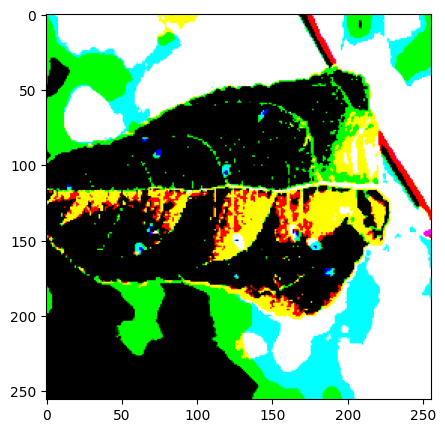

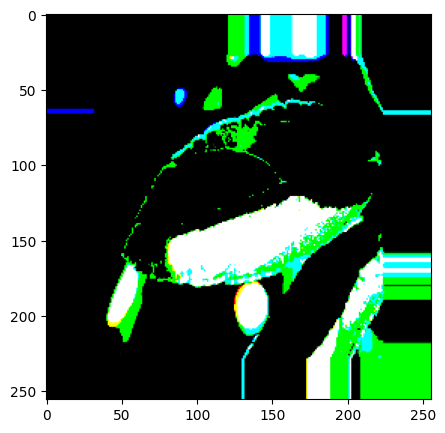

In [ ]:
plotImage(t_img[:4], label[:4])

In [ ]:
import keras

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.resnet import ResNet152

In [ ]:
base_model = ResNet152(input_shape = (256,256,3), include_top = False)

234698864/234698864 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
base_model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [ ]:
X = Flatten()(base_model.output)

X = Dense(units = 3, activation = 'softmax')(X)

In [ ]:
#Creating Models
model = Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

e_stop = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)

modelCP = ModelCheckpoint(filepath = "best_model.h5",
                          monitor = 'val_accuracy',
                          min_delta = 0.01, patience = 3,
                          verbose = 1,
                          save_best_only = True)

call_back = (e_stop, modelCP)

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])
history = model.fit(train, steps_per_epoch = 16,
                    epochs = 50,
                    verbose = 1,
                    callbacks = call_back,
                    validation_data = val,
                    validation_steps = 16)

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 24.3809 - accuracy: 0.3125
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to best_model.h5
16/16 [==============================] - 63s 3s/step - loss: 24.3809 - accuracy: 0.3125 - val_loss: 14.9693 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 20.6126 - accuracy: 0.6250
Epoch 2: val_accuracy improved from 0.50000 to 0.66667, saving model to best_model.h5
16/16 [==============================] - 63s 4s/step - loss: 20.6126 - accuracy: 0.6250 - val_loss: 9.7811 - val_accuracy: 0.6667
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 10.3415 - accuracy: 0.6875
Epoch 3: val_accuracy improved from 0.66667 to 0.81250, saving model to best_model.h5
16/16 [==============================] - 64s 4s/step - loss: 10.3415 - accuracy: 0.6875 - val_loss: 5.9736 - val_accuracy: 0.8125
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 1

In [ ]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

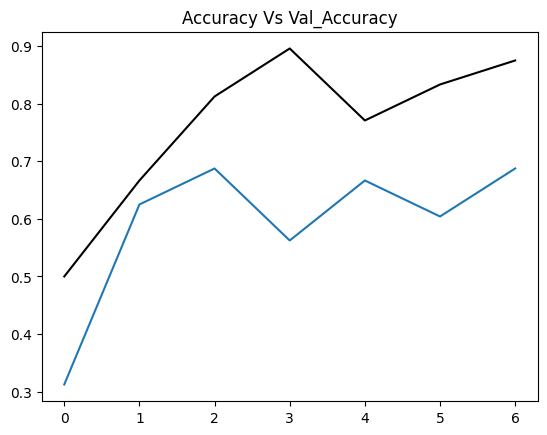

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c = "black")
plt.title("Accuracy Vs Val_Accuracy")
plt.show()

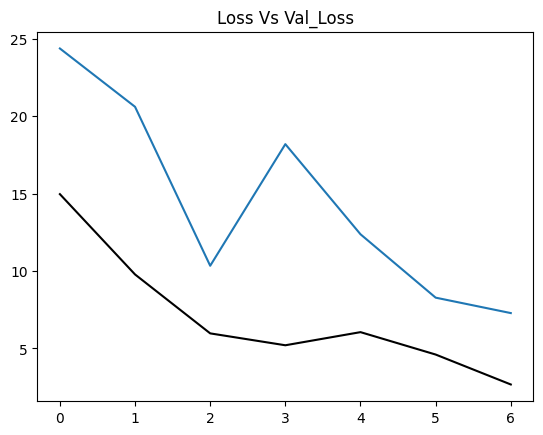

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c = "black")
plt.title("Loss Vs Val_Loss")
plt.show()

In [ ]:
#Best Model

from keras.models import load_model

model = load_model("best_model.h5")

In [ ]:
ref = dict(zip((train.class_indices.values()),list(train.class_indices.keys()) ))

In [ ]:
acc = model.evaluate(val)[1]

print("Accuracy of the model is ",acc * 100, "%")

In [ ]:
from IPython.display import Image, display


def prediction(path):
    img = load_img(path, target_size = (256,256))
    i = img_to_array(img)
    im = preprocess_input(i)
    img = py.expand_dims(im, axis = 0)
    pred = py.argmax(model.predict(img))
    display(Image(filename = path))
    print(f" The image is { ref[pred] }")

In [ ]:
train.class_indices

In [ ]:
path = '/content/drive/MyDrive/Expo/dataSet/TEST/Test_124.jpg'
prediction(path)
